# Solving supervised machine learning problems (from the perspective of inductive programming).
Inductive program synthesis (aka inductive programming) is a subfield in the program synthesis that studies program generation from incomplete information, namely from the examples for the desired input/output behavior of the program. Genetic programming (GP) is one of the numerous approaches for the inductive synthesis characterized by performing the search in the space of syntactically correct programs of a given programming language.

In the context of supervised machine learning (SML) problem-solving, one can define the task of a GP algorithm as the program/function induction from input/output examples that identifies the mapping $f:S\mapsto R$ in the best possible way, generally measured through solution’s generalization ability on previously unseen data.

Geometric Semantic Genetic Programming (GSGP) is a variant of GP where the standard crossover and mutation operators are replaced by the so-called Geometric Semantic Operators (GSOs).

## SMLGS problem type.
Given the definitions provided above and in order to make it possible to perform automatic induction of programs from the input/output-examples, we have conceptualized a module called ``inductive_programming`` which contains different problem types, materialized as classes. One of them, called ``SMLGS``, a subclass of ``Problem``, aims at supporting the SML problem-solving, more specifically the symbolic regression and binary classification, by means of GSGP.


<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-319-44003-3_1/MediaObjects/393665_1_En_1_Fig6_HTML.gif" alt="Drawing" style="width: 300px;"/>

# 1. Create an instance of ``SMLGS``

In [3]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 33.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 17.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━

In [28]:
pip install --force-reinstall pandas==1.1.5

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached pandas-1.1.5-cp38-cp38-manylinux1_x86_64.whl (9.3 MB)
  Using cached numpy-1.24.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2023.3
    Uninstalling pytz-2023.3:
      Successfully uninstalled pytz-2023.3
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.

In [5]:
cd ./general-purpose-optimization-library

/home/ec2-user/SageMaker/Genetic_Programing/general-purpose-optimization-library


In [6]:
!pip install .

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Processing /home/ec2-user/SageMaker/Genetic_Programing/general-purpose-optimization-library
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 33.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 22.2 MB/s eta 0:00:0000:0100:01
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      running bdist_wheel
      running build
      running build_py
      /home/ec2-user/anaconda3/envs/mxnet_p38/lib/python3.8/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      installing to build/bdist.linux-x86_64/wheel
      running

In [7]:
cd ..

/home/ec2-user/SageMaker/Genetic_Programing


Loads the necessary classes and functions.

In [1]:
# Imports utility libraries 
import os
import datetime
import pandas as pd
pd.set_option('display.max_columns', None)

# Imports PyTorch
import torch
# Imports problems
from gpol.problems.inductive_programming import SMLGS
from gpol.utils.datasets import load_boston
from gpol.utils.utils import train_test_split, rmse
from gpol.utils.inductive_programming import function_map, prm_reconstruct_tree, _execute_tree, _get_tree_depth
# Imports metaheuristics 
from gpol.algorithms.genetic_algorithm import GSGP
# Imports operators
from gpol.operators.initializers import rhh, prm_full
from gpol.operators.selectors import prm_tournament
from gpol.operators.variators import prm_efficient_gs_xo, prm_efficient_gs_mtn

Creates an instance of ``SMLGS`` problem. The search space (*S*) of an instance of ``SMLGS`` problem consists of the following key-value pairs:
- ``"n_dims"`` is the number of input features (aka input dimensions) in the underlying ``SMLGS`` problem's instance;
- ``"function set"`` is the set of primitive functions;
- ``"constant set"`` is the set of constants to draw terminals from;
- ``"p_constants"`` is the probability of generating a constant when sampling a terminal; and
-  ``max_init_depth`` is the trees’ maximum depth during the initialization.

Besides the traditional triplet ``sspace``, ``ffunction`` and ``min_``, one has to provide the problem's instance with the input data (``X`` and ``y`` tensors), partitions' indexes (``train_indices`` and ``test_indices``), and the size of the batches (``batch_size``).

In [2]:
# Defines the processing device and random state 's seed
device, seed  = 'cpu', 0  # 'cuda' if torch.cuda.is_available() else 'cpu', 0
# Loads and allocates the data on the processing device
X, y = load_boston(X_y=True)
X = X.to(device)
y = y.to(device)
# Defines parameters for the data usage
batch_size, shuffle, p_test = 50, True, 0.3
# Performs train/test split
train_indices, test_indices = train_test_split(X=X, y=y, p_test=p_test, shuffle=shuffle, indices_only=True, seed=seed)

In [3]:
device, seed  = 'cpu', 0  # 'cuda' if torch.cuda.is_available() else 'cpu', 0
# Loads and allocates the data on the processing device

df = pd.read_csv('./dataset.csv')
df = df.fillna(0)
df = df.drop(columns=['time_avgBetweenReceivedTxn_other', 'time_avgBetweenTxn_other', 'walletAddress', 'time_avgBetweenTxn_approval',
                      'erc20_mostSentTokenAddress_approval', 'time_diffBetweenFirstAndLastTxn_approval', 'erc20_mostSentTokenAddress_other',
                      'time_diffBetweenFirstAndLastTxn_other', 'erc20_mostSentTokenAddress_transfer', 'time_avgBetweenTxn_transfer', 'time_diffBetweenFirstAndLastTxn_transfer'])

# creating tensor from targets_df 
y = torch.tensor(df['Target'].values)

X = torch.tensor(df.iloc[:,1:-7].values)
X = X.to(device)
y = y.to(device)


# Defines parameters for the data usage
batch_size, shuffle, p_test = 50, True, 0.3
# Performs train/test split
train_indices, test_indices = train_test_split(X=X, y=y, p_test=p_test, shuffle=shuffle, indices_only=True, seed=seed)

In [4]:
df.shape

(4914, 61)

In [5]:
X

tensor([[  5.,   0.,   1.,  ..., 106.,   3.,  40.],
        [  1.,   0.,   1.,  ...,  27.,   4.,  21.],
        [  2.,   0.,   1.,  ...,  35.,   8.,  19.],
        ...,
        [  0.,   0.,   0.,  ...,   0.,   1.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   1.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   1.,   0.]], dtype=torch.float64)

In [57]:
df['Target'].value_counts()

0    4727
1     187
Name: Target, dtype: int64

In [6]:
# Characterizes the program elements: function and constant sets
f_set = [function_map["add"], function_map["sub"], function_map["mul"], function_map["div"]]
c_set = torch.tensor([-1.0, -0.5, 0.5, 1.0], device=device)
# Creates the search space
sspace = {"n_dims": X.shape[1], "function_set": f_set, "p_constants": 0.1, "constant_set": c_set, "max_init_depth": 5}
# Creates problem's instance
pi = SMLGS(sspace=sspace, ffunction=rmse, X=X, y=y, train_indices=train_indices, test_indices=test_indices,
           batch_size=100, min_=True)

# 2. Parametrize the GSGP algorithm.

The cell in below creates a dictionary, called ``pars``, to store GSGP-specific parameters. The mutation and crossover operators, ``prm_efficient_gs_mtn`` and ``prm_efficient_gs_xo`` respectively, were specifically designed to resemble the implementation proposed in *A C++ framework for geometric semantic genetic programming* by Castelli et al.

The tensor ``ms`` represents the steps of the GSM operator; if it is a single-valued tensor, then the mutation step is always the same and equals ``ms``; if it is a vector, then, at each call of the operator, the mutation step is selected at random from ``ms``. 

In [7]:
# Defines population's size
pop_size = 1000
# Creates single trees' initializer for the GSOs
sp_init = prm_full(sspace)  
# Generates GSM's steps
to, by = 1.0, 0.2  
ms = torch.arange(by, to + by, by, device=device)
# Defines selection's pressure and mutation's probability
pars = {"pop_size": pop_size, "initializer": rhh, "selector": prm_tournament(pressure=0.1),
        "mutator": prm_efficient_gs_mtn(X, sp_init, ms), "crossover": prm_efficient_gs_xo(X, sp_init),
        "p_m": 0.5, "p_c": 0.5, "elitism": True, "reproduction": True}

### Just Crossover

In [45]:
# Defines population's size
pop_size = 1000
# Creates single trees' initializer for the GSOs
sp_init = prm_full(sspace)  
# Generates GSM's steps
to, by = 5.0, 0.25  
ms = torch.arange(by, to + by, by, device=device)
# Defines selection's pressure and mutation's probability
pars = {"pop_size": pop_size, "initializer": rhh, "selector": prm_tournament(pressure=0.1),
        "mutator": prm_efficient_gs_mtn(X, sp_init, ms), "crossover": prm_efficient_gs_xo(X, sp_init),
        "p_m": 0, "p_c": 0.2, "elitism": True, "reproduction": True}

### Just Mutation

# 3. Prepares the connection strings.
Following the implementation proposed in *A C++ framework for geometric semantic genetic programming* by Castelli et al., the initial population of trees and the intermediary random trees, generated throughout the evolution during GSOs' application, must be stored on disk. The cell in below creates the necessary paths: 
-  ``path`` is a connection string towards GSGP's main log-folder;
-  ``path_init_pop`` is a connection string towards initial population's repository;
-  ``path_rts`` is a connection string towards random trees' repository; and
-  ``path_hist`` is a connection string towards the history's file (a file that stores solutions' genealogy).

In [46]:
# Creates the experiment's label
experiment_label = "SMLGS"  # SML approached from the perspective of Inductive Programming using GSGP
time_id = str(datetime.datetime.now().date()) + "_" + str(datetime.datetime.now().hour) + "_" + \
          str(datetime.datetime.now().minute) + "_" + str(datetime.datetime.now().second)
# Creates general path
path = os.path.join(os.getcwd(), experiment_label + "_" + time_id)
# Defines a connection string to store random trees
path_rts = os.path.join(path, "reconstruct", "rts")
if not os.path.exists(path_rts):
    os.makedirs(path_rts)
# Defines a connection string to store the initial population
path_init_pop = os.path.join(path, "reconstruct", "init_pop")
if not os.path.exists(path_init_pop):
    os.makedirs(path_init_pop)
# Creates a connection string towards the history's file
path_hist = os.path.join(path, "reconstruct", experiment_label + "_seed_" + str(seed) + "_history.csv")

# 4. Executes the experiment.

Defines the computational resources for the experiment: the number of iterations.

In [47]:
n_iter = 50

The code in below creates an instance of type ``GSGP`` with the aforementioned parameters. At the end of the search, the method ``write_history`` stores on disk the solutions' genealogy.

Note that besides algorithm-specific parameters, the constructor of an instance of ``GSGP`` algorithm also receives:
-  ``path_init_pop`` is path where the initial trees will be stored;
-  ``path_rts`` is path where the random trees generated throughout the evolution will be stored;
-  ``seed`` is used to initialize a pseudorandom number generator; and
-  ``device`` is the specification of the processing (either CPU or GPU).

The ``solve`` method has the same signature for all the search algorithms and, in this case, includes the following parameters: 
-  ``n_iter``: number of iterations to conduct the search;
-  ``tol``: minimum required (training) fitness improvement for ``n_iter_tol`` consecutive iterations to continue the search. When the fitness is not improving by at least ``tol`` for ``n_iter_tol`` consecutive iterations, the search will be automatically interrupted;
-  ``n_iter_tol``: maximum number of iterations to not meet ``tol`` improvement;
-  ``test_elite``: a flag indicating whether the best-so-far solution (𝑖) should be evaluated on test partition (regards SML-OPs);
-  ``verbose``: verbosity's detail-level;
-  ``log``: log-files' detail-level (if exists).

In [48]:
isa = GSGP(pi=pi, path_init_pop=path_init_pop, path_rts=path_rts, seed=seed, device=device, **pars)
isa.solve(n_iter=n_iter, tol=0.02, n_iter_tol=5, test_elite=True, verbose=2, log=0)
isa.write_history(path_hist)
print("Algorithm: {}".format(isa.__name__))
print("Best solution's fitness: {:.3f}".format(isa.best_sol.fit))
print("Best solution's test fitness: {:.3f}".format(isa.best_sol.test_fit))

-------------------------------------------------------------------------------------------------------
           |                    Best solution                      |            Population            |
-------------------------------------------------------------------------------------------------------
Generation | Length   Fitness          Test Fitness         Timing | AVG Fitness           STD Fitness
-------------------------------------------------------------------------------------------------------
0          | 4914     0.141421         0.173205              0.430 | 1.17723e+11           3.72099e+12
1          | 4914     0.141421         0.173205              2.309 | 1.52245                   1.27503
2          | 4914     0.0876533        0.227081              1.491 | 1.38252                   1.25054
3          | 4914     0.0876533        0.0998934             1.498 | 1.47699                   1.30273
4          | 4914     0.0876533        0.208087              1.532 | 

# 5. Reconstructs the tree.
In order to reconstruct the tree, the user needs to:
1.  read the historical records (the solutions' genealogy);
2.  create a parametrized reconstruction function using ``prm_reconstruct_tree``. The latter receives the historical records' ``pandas.DataFrame``, the paths towards the initial and random trees, and the processing devices that was used to conduct the search.
3.  choose the solution to reconstruct (by specifying its index);
4.  call the reconstruction function by passing the index of the desired solution.

In [49]:
history = pd.read_csv(os.path.join(path_hist), index_col=0)
# Creates a reconstruction function
reconstructor = prm_reconstruct_tree(history, path_init_pop, path_rts, device)
# Chooses the most fit individual to reconstruct
start_idx = history["Fitness"].idxmin()
print("Starting index (chosen individual):", start_idx)
print("Individual's info:\n", history.loc[start_idx])
# Reconstructs the individual
ind = reconstructor(start_idx)
print("Automatically reconstructed individual's representation:\n", ind[0:30])

Starting index (chosen individual): 0_6_o2_xo_10924
Individual's info:
 Iter                      6
Operator          crossover
T1           0_5_o2_xo_8688
T2           0_5_o1_xo_9251
Tr          0_6_rt_xo_10922
ms                       -1
Fitness           0.0620611
Name: 0_6_o2_xo_10924, dtype: object
Automatically reconstructed individual's representation:
 [add, mul, lf, mul, div, sub, sub, add, 10, 50, sub, 48, 9, div, div, 33, 2, div, 31, 14, div, add, sub, 5, 16, mul, 20, 40, div, div]


Prints individuals length and depth.

In [50]:
print("Length", len(ind))
print("Depth", _get_tree_depth(ind))

Length 3360
Depth 18


Executes the reconstructed individual on the whole dataset. 

In [51]:
y_pred = _execute_tree(ind, X)
print("Individual's RMSE on X: ", rmse(y, y_pred))

Individual's RMSE on X:  tensor(0.1581, dtype=torch.float64)


In [111]:
y_pred = (y_pred_prob>0.5).float()

NameError: name 'y_pred_prob' is not defined

In [52]:
from sklearn.metrics import PrecisionRecallDisplay

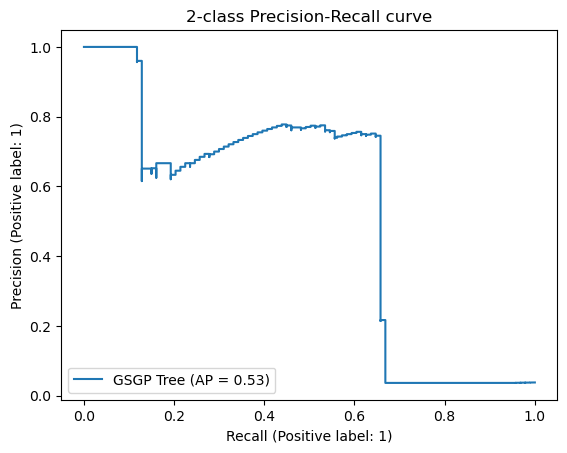

In [53]:
display = PrecisionRecallDisplay.from_predictions(y, y_pred,name="GSGP Tree")#y_test, y_score, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [35]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score

y_pred_bin = (y_pred>0.5).float()

print('F1_Score:' + str(f1_score(y, y_pred_bin)))
print('Recall:' + str(recall_score(y, y_pred_bin)))
print('Precision:' + str(precision_score(y, y_pred_bin)))

F1_Score:0.5694915254237289
Recall:0.44919786096256686
Precision:0.7777777777777778


## Decision Tree test:

In [47]:
X[test_indices]

tensor([[ 0.,  0.,  0.,  ...,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  ...,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  ..., 48.,  6., 38.],
        ...,
        [ 2.,  0.,  1.,  ..., 32.,  2., 10.],
        [ 0.,  0.,  0.,  ...,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  1.]], dtype=torch.float64)

In [58]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X[train_indices], y[train_indices])

y_pred_dt = clf.predict_proba(X[test_indices])[:,1]

In [59]:
y_pred = _execute_tree(ind, X[test_indices])

F1_Score:0.6391752577319588
Recall:0.5254237288135594
Precision:0.8157894736842105


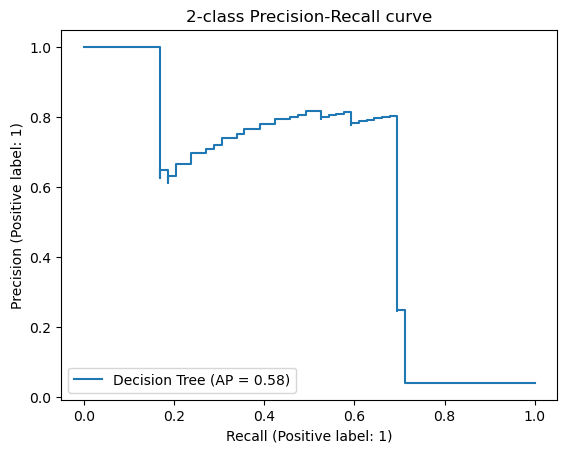

In [61]:
display = PrecisionRecallDisplay.from_predictions(y[test_indices], y_pred,name="Decision Tree")#y_test, y_score, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")

y_pred_bin = (y_pred>0.5).float()

print('F1_Score:' + str(f1_score(y[test_indices], y_pred_bin)))
print('Recall:' + str(recall_score(y[test_indices], y_pred_bin)))
print('Precision:' + str(precision_score(y[test_indices], y_pred_bin)))

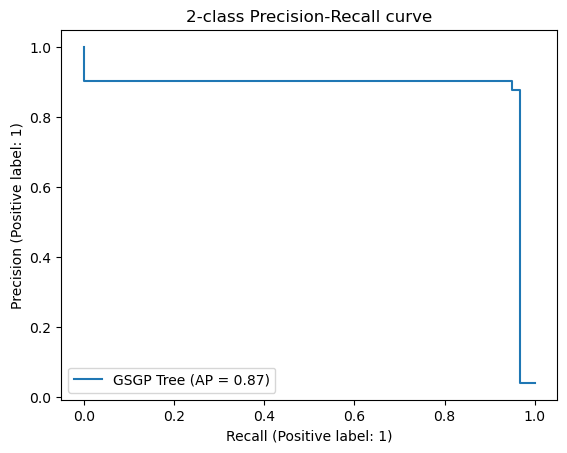

In [46]:
display = PrecisionRecallDisplay.from_predictions(y[test_indices], y_pred_dt,name="GSGP Tree")#y_test, y_score, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")